# Predicting Titanic Survival Classification

This notebook looks into various machine learning and data science libraries in an attempt to predict if the passenger in the Titanic ship will survive or not based on the data about them.

We're going to use the following approach

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


**Problem definition:**
> With the passenger details, can we predict whether a passenger will survive or not?

**Data:**
> The data is available at Kaggle: https://www.kaggle.com/c/titanic/data

**Evaluation:**
> Until we reach around 95% accuracy on predicting if a passenger will survive, we will pursue the project

**Features:**
> This is where you'll get different information about each of the features in your data

> Data Dictionary
* PassengerId - This is a serial order of unique IDs
* Survived - Target label (Dependent variable) (1 = Survive, 0 = Not Survive)
* Pclass - Class of the passenger (1 = First, 2 = Second, 3 = Third)
* Name - Name of the passenger
* Sex - Gender of the passenger
* Age - Age of the passenger
* SibSp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin where the passenger's room is
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**Preparing the tools:**
> We are going to use Pandas, Numpy and Matplotlib for data analysis

In [96]:
# Import all the tools we need
 
# Regular lubrabries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# As we want our plots to appear in the notebook, let's add this
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics import roc_curve

In [97]:
train_data = pd.read_csv("train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [98]:
test_data = pd.read_csv("test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Exploratory Data Analysis

The goal here is to find out more about the data aand become a subject matter expert on the data we're workign with:

1. What questions are you trying to solve?
2. What kind of data we have and check the different type of data?
3. What is missing in the data and how can we deal with it?
4. Where are the outliners and why should we care of them?
5. How can we add, change or removed features in the data?

In [99]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

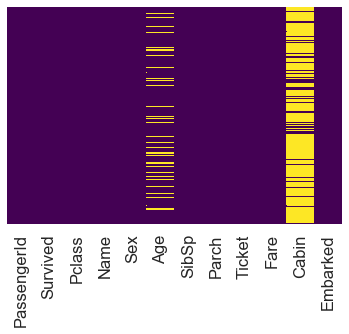

In [101]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [102]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

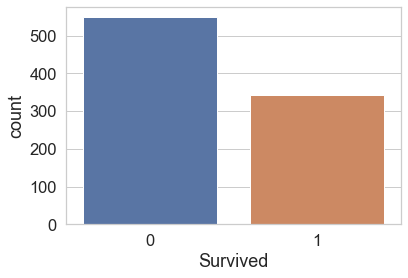

In [103]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train_data)

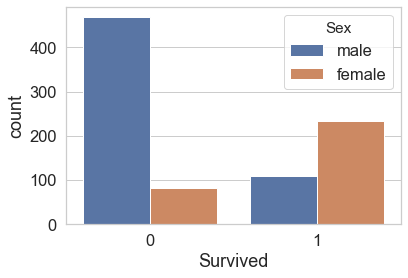

In [104]:
sns.countplot(x="Survived", hue="Sex", data=train_data)

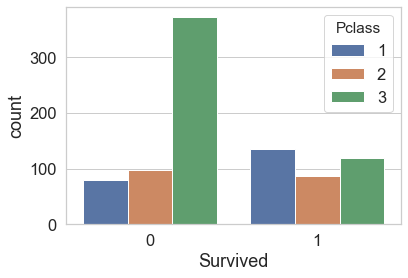

In [105]:
sns.countplot(x="Survived", hue="Pclass", data=train_data)

In [106]:
pd.crosstab(train_data.Survived, train_data.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


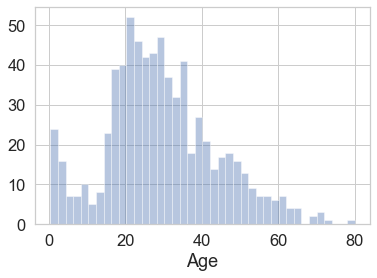

In [107]:
sns.distplot(train_data["Age"].dropna(), kde=False, bins=40);

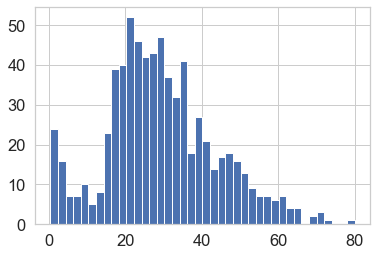

In [108]:
# Another way to visualize to see a histogram for Age

train_data["Age"].hist(bins=40);

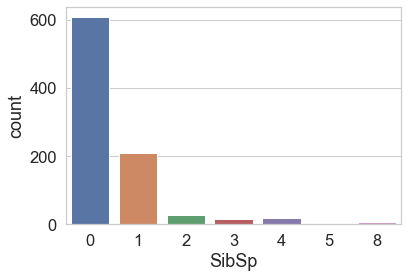

In [109]:
sns.countplot(x="SibSp", data=train_data);

In [110]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

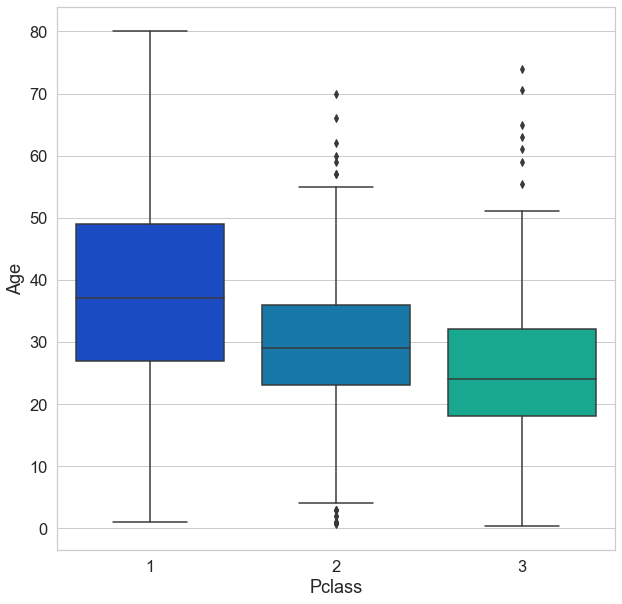

In [111]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Pclass", y="Age", data=train_data, palette="winter");

In [112]:
train_data["Age"][888]

nan

In [113]:
# As Age column has many missing values, we are trying to replace them mean age in a particular class

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pclass == 1:
        return 37

    if pclass == 2:
        return 29

    if pclass == 3:
        return 24
    
    return age
    
train_data["Age"] = train_data[["Age", "Pclass"]].apply(impute_age, axis=1)
test_data["Age"] = test_data[["Age", "Pclass"]].apply(impute_age, axis=1)

In [114]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


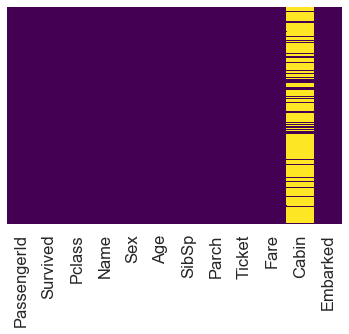

In [115]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap="viridis");

In [116]:
# As the Cabin feature has a lot of missing values, it is better we drop the column instead of imputing any values

train_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)

In [117]:
# Dropping missing rows if we see only a few of the records has it in Embarked column (train) and Fare (test) of data
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [118]:
train_data.head()
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


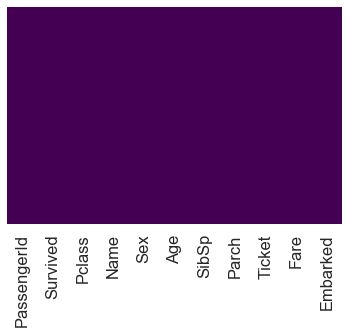

In [119]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap="viridis");

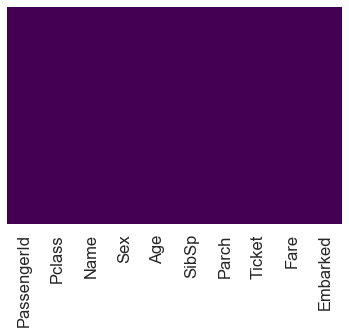

In [120]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap="viridis");

### Converting Categorical features into numbers

Now, we need to convert the categorical features into numbers using dummy() function. So that our model do not through an error while evaluation

In [121]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 83.3+ KB


In [122]:
sex = pd.get_dummies(train_data["Sex"])
embark = pd.get_dummies(train_data["Embarked"])

sex, embark

(     female  male
 0         0     1
 1         1     0
 2         1     0
 3         1     0
 4         0     1
 ..      ...   ...
 886       0     1
 887       1     0
 888       1     0
 889       0     1
 890       0     1
 
 [889 rows x 2 columns],      C  Q  S
 0    0  0  1
 1    1  0  0
 2    0  0  1
 3    0  0  1
 4    0  0  1
 ..  .. .. ..
 886  0  0  1
 887  0  0  1
 888  0  0  1
 889  1  0  0
 890  0  1  0
 
 [889 rows x 3 columns])

In [123]:
train_data.drop(["Name","Sex","Ticket","Embarked"], axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500


In [124]:
train = pd.concat([train_data, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,24,1,0,7.2500,0,1,0,0,1
1,2,1,1,37,1,0,71.2833,1,0,1,0,0
2,3,1,3,24,0,0,7.9250,1,0,0,0,1
3,4,1,1,37,1,0,53.1000,1,0,0,0,1
4,5,0,3,24,0,0,8.0500,0,1,0,0,1


In [125]:
# Let's do the same with test data set
sex = pd.get_dummies(test_data["Sex"])
embark = pd.get_dummies(test_data["Embarked"])

test_data.drop(["Name","Sex","Ticket","Embarked"], axis=1, inplace=True)
test = pd.concat([test_data, sex, embark], axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,892,3,24,0,0,7.8292,0,1,0,1,0
1,893,3,24,1,0,7.0000,1,0,0,0,1
2,894,2,29,0,0,9.6875,0,1,0,1,0
3,895,3,24,0,0,8.6625,0,1,0,0,1
4,896,3,24,1,1,12.2875,1,0,0,0,1


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
female         889 non-null uint8
male           889 non-null uint8
C              889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(1), int64(6), uint8(5)
memory usage: 59.9 KB


In [127]:
# Let's see a correlation matrix

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.035886,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,0.329923,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.993741,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.035886,0.329923,-0.993741,1.000000,-0.076487,-0.016939,0.570050,0.122152,-0.122152,0.263875,-0.209434,-0.099365
SibSp,-0.057686,-0.034040,0.081656,-0.076487,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.016939,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.570050,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
female,-0.043136,0.541585,-0.127741,0.122152,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
male,0.043136,-0.541585,0.127741,-0.122152,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
C,-0.001208,0.169966,-0.245733,0.263875,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613


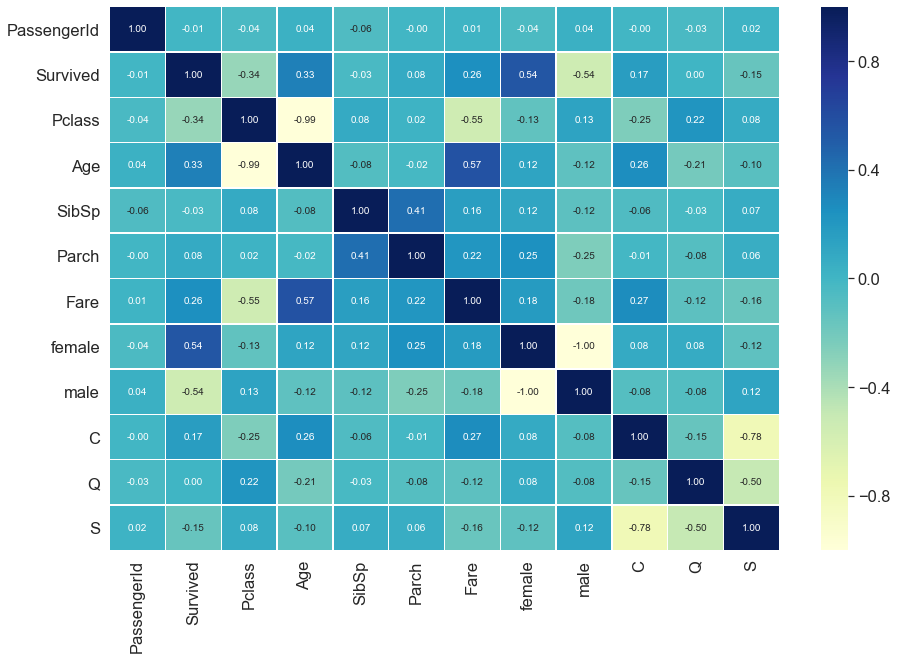

In [128]:
# Let's make the correlation more visual using heatmap
corr_mat = train.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [129]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,24,1,0,7.2500,0,1,0,0,1
1,2,1,1,37,1,0,71.2833,1,0,1,0,0
2,3,1,3,24,0,0,7.9250,1,0,0,0,1
3,4,1,1,37,1,0,53.1000,1,0,0,0,1
4,5,0,3,24,0,0,8.0500,0,1,0,0,1


As we have now converted all the categorical features into numeric, we can now move with building a model

In [130]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

X_test = test
y_test = pd.read_csv("y_test.csv")
y_test = y_test.drop("PassengerId", axis=1)
y_test = y_test.drop(y_test.index[151])
len(y_test)

417

Now we have got the data split into train and test, it's time to build a machine learning model.

We will train it (find the patterns) and fit to test it.

We are going to try out 3 different machine learning models

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [131]:
# Let's create a dict for models
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and train our models
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models: A dict of different Scikit-Learn models
    X_train: training data (no labels)
    X_test: testing data (no labels)    
    y_train: training label
    y_test: test label
    """    
    
    # Set random seed
    np.random.seed(42)
    
    # Make a dict to score of each model
    model_scores = {}    
    
    # Loop through the models to Fit them
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        
        # Evaluate the score
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [132]:
model_scores = fit_and_score(models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.9400479616306955,
 'KNN': 0.6498800959232613,
 'Random Forest': 0.7529976019184652}

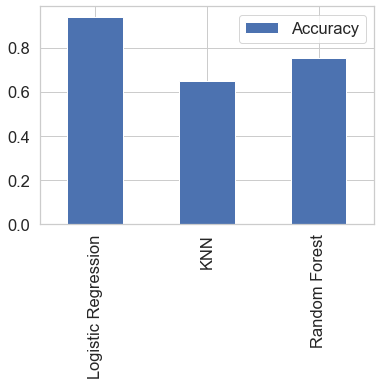

In [133]:
# Let's plot the results to see Model comparison
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

In [134]:
log_reg_model = models["Logistic Regression"]
y_preds = log_reg_model.predict(X_test)

accuracy_score(y_test, y_preds)

0.9400479616306955

Now we have got our baseline model and we know that a model's first predictions aren't always what we should based our next steps off...What should do?

Let's look at the following:

* Hyperparameters tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameters tuning

In [135]:
# Let's tune KNN

training_score = []
testing_score = []

# Create a different values for n_neighbors in the KNN model
neighbors = range(1,21)

# Set up a KNN classifier
knn = KNeighborsClassifier()

# Loop through to try different n_neighbors value as a paramter for KNN model
for x in neighbors:
    knn.set_params(n_neighbors=x)
    knn.fit(X_train, y_train)
    
    training_score.append(knn.score(X_train, y_train))
    testing_score.append(knn.score(X_test, y_test))    

In [136]:
training_score, testing_score

([1.0,
  0.8098987626546682,
  0.8053993250843644,
  0.750281214848144,
  0.735658042744657,
  0.7266591676040495,
  0.7379077615298087,
  0.7154105736782902,
  0.6985376827896513,
  0.703037120359955,
  0.703037120359955,
  0.6996625421822272,
  0.7064116985376828,
  0.6917885264341957,
  0.6782902137232846,
  0.6861642294713161,
  0.6861642294713161,
  0.6839145106861643,
  0.688413948256468,
  0.6861642294713161],
 [0.6282973621103117,
  0.6258992805755396,
  0.6211031175059952,
  0.6546762589928058,
  0.6498800959232613,
  0.6474820143884892,
  0.645083932853717,
  0.6474820143884892,
  0.6498800959232613,
  0.645083932853717,
  0.6402877697841727,
  0.657074340527578,
  0.657074340527578,
  0.6522781774580336,
  0.6546762589928058,
  0.6498800959232613,
  0.6522781774580336,
  0.6498800959232613,
  0.6498800959232613,
  0.6498800959232613])

Max KNN score on the test data: 65.71%


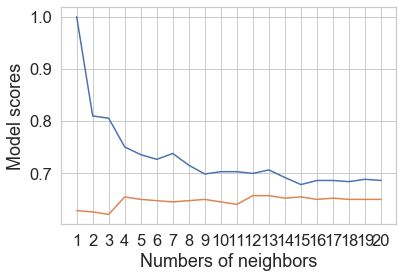

In [137]:
# Let's visualize these scores

plt.plot(neighbors, training_score, label="Train Score")
plt.plot(neighbors, testing_score, label="Test Score")
plt.xlabel("Numbers of neighbors")
plt.ylabel("Model scores")
plt.xticks(np.arange(1,21));

print(f"Max KNN score on the test data: {max(testing_score)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

Let's try to tune other models as KNN is not promising.

We are going to tune:

1. LogisticRegression()
2. RandomForestClassifier()

..using RandomizedSearchCV

In [138]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": [0.001,0.01,0.1,1,10,100,100,10000],
                "solver": ["liblinear"]}

np.random.seed(42)

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators": np.arange(10,300,50),
           "max_depth": [None, 3, 5, 10],
           'min_samples_leaf': np.arange(1, 20, 2),
           'min_samples_split': np.arange(1, 30, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomziedSearchCV...

In [139]:
# Tune LogisticRegression()

np.random.seed(42)

# Set up random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit randomized hyperparameter search for LogisticRegression()
rs_log_reg.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100,
                                              10000],
                                        'solver': ['liblinear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=Tr

In [140]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.1}

In [141]:
rs_log_reg.score(X_test, y_test)

0.9568345323741008

### Hyperparameter tuning with GridSearchCV
Since the LogisticRegression() model scored best so far even with RandomizedSearchCV. Let's try to tune the hyperparameters wtih GridSearchCV

In [142]:
# Tune LogisticRegression()
np.random.seed(42)

log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True);

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000000...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [143]:
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [144]:
gs_log_reg.score(X_test, y_test)

0.9544364508393285

Now we know that RandomizedSearchCV showed better results than GridSearchCV. So let's go with it.

We have succesfully achieved 95% with LogisticRegression() model. Let's try for RandomForestClassifier() once

In [145]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   24.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [146]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 23,
 'min_samples_leaf': 7,
 'max_depth': 3}

In [147]:
rs_rf.score(X_test, y_test)

0.9064748201438849

In [148]:
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
 'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])}

So the best we could do with RandomForestClassifier() is of 90% which is not bad either. But LogisticRegression() is still ahead.

### Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...and it would be great if cross-validation was used if possible

To make comparisons and evaluate our trained models, first we need to make predictions

In [149]:
# Make predictions on tuned model

y_preds = rs_log_reg.predict(X_test)
y_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

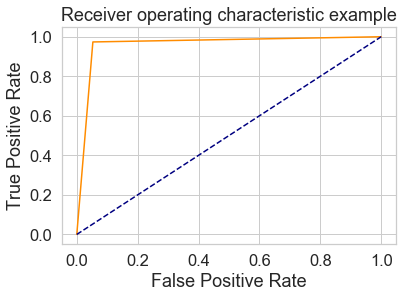

In [150]:
# ROC curve and AUC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve(y_test, y_preds)
plt.plot(fpr,tpr, color="darkorange");
plt.plot([0, 1], [0, 1], color='navy', linestyle='--');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example');

#### Confusion matrix

In [151]:
confusion_matrix(y_test, y_preds)

array([[251,  14],
       [  4, 148]], dtype=int64)

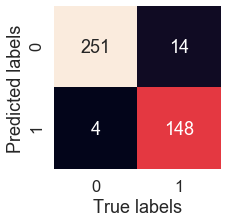

In [152]:
# Let's visualize this confusion matrix using Seaborn's heatmap

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                fmt='g',
                cbar=False)

    plt.xlabel("True labels")
    plt.ylabel("Predicted labels")
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

Now we've got ROC curve, AUC curve and Confusion matrix, let's get a classification report as well as a cross-validated precision, recall, f1-score.

In [153]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       265
           1       0.91      0.97      0.94       152

    accuracy                           0.96       417
   macro avg       0.95      0.96      0.95       417
weighted avg       0.96      0.96      0.96       417

